## Projeto DIO - Analise Exploratoria - jul-21

##### Projeto desenvolvido em Python 3.8.2.
By:. devCasserone

In [54]:
# pip install pandas
# pip install seaborn
# pip install openpyxl

In [35]:
import pandas as pd
import seaborn as sns
import os

In [50]:
file_path = os.getcwd()
# os.path.dirname(os.path.realpath(__file__))

In [55]:
# df = pd.read_csv(file_path + "/datasets/Gapminder.csv",error_bad_lines=False, sep=";")
df = pd.read_excel(file_path + "/datasets/AdventureWorks.xlsx")

In [57]:
#Visualizando as 5 primeiras linhas
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [58]:
#Ultimas 5 linhas
df.tail(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,330.99,999.0,6,1198.8,4795.2,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
903,2008-12-21,2008-12-25,306,1155,19060,200812214CS676,324.69,980.0,6,1176.0,4704.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black


In [72]:
# Exemplo rename
# df = df.rename(
#         columns={
#             "country":"Pais", 
#             "continent": "continente", 
#             "year":"Ano", 
#             "lifeExp":"Expectativa de vida", 
#             "pop":"Pop Total", 
#             "gdpPercap": "PIB"
#             }
#     )


df.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace = True)

In [73]:
#Total de linhas e colunas
df.shape

(904, 16)

In [74]:
df.columns

Index(['data_venda', 'data_envio', 'id_loja', 'id_produto', 'id_cliente',
       'no._venda', 'custo_unitário', 'preço_unitário', 'quantidade',
       'valor_desconto', 'valor_venda', 'produto', 'fabricante', 'marca',
       'classe', 'cor'],
      dtype='object')

In [75]:
df.dtypes

data_venda        datetime64[ns]
data_envio        datetime64[ns]
id_loja                    int64
id_produto                 int64
id_cliente                 int64
no._venda                 object
custo_unitário           float64
preço_unitário           float64
quantidade                 int64
valor_desconto           float64
valor_venda              float64
produto                   object
fabricante                object
marca                     object
classe                    object
cor                       object
dtype: object

In [76]:
df.describe()

,id_loja,id_produto,id_cliente,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,270.015487,1225.238938,19029.092920,272.006150,742.527965,62.950221,689.123294,6620.139538
std,50.955280,706.698742,96.427655,129.765051,368.589889,148.945964,822.363117,4319.407257
min,199.000000,366.000000,18815.000000,5.090000,9.990000,2.000000,0.000000,159.840000
25%,199.000000,384.000000,18964.750000,324.690000,758.000000,6.000000,0.000000,3920.000000
50%,306.000000,1202.000000,19060.000000,330.660000,980.000000,9.000000,461.166000,5798.700000
75%,307.000000,1226.000000,19107.000000,348.580000,998.000000,17.000000,1005.075000,7986.000000
max,307.000000,2497.000000,19145.000000,348.580000,999.000000,1560.000000,6272.000000,29400.000000


In [78]:
df["id_loja"].unique()

array([199, 306, 307], dtype=int64)

In [82]:
lj_306 = df.loc[df["id_loja"] == 306]
lj_306.head()

,data_venda,data_envio,id_loja,id_produto,id_cliente,no._venda,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
5,2008-07-12,2008-07-20,306,384,19054,200807123CS588,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


<AxesSubplot:>

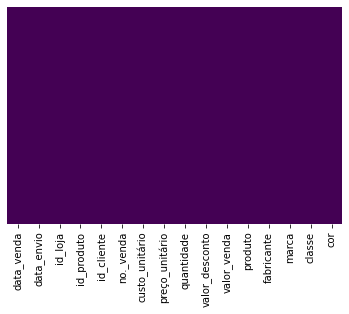

In [84]:
#Consultando linhas com valores faltantes
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap='viridis')

In [85]:
df.isnull().sum()

data_venda        0
data_envio        0
id_loja           0
id_produto        0
id_cliente        0
no._venda         0
custo_unitário    0
preço_unitário    0
quantidade        0
valor_desconto    0
valor_venda       0
produto           0
fabricante        0
marca             0
classe            0
cor               0
dtype: int64

In [48]:
#Substituindo os valores nulos pela média
# df["continente"].fillna('Sem informacao', inplace=True)

In [90]:
df["custo"] = df["custo_unitário"].mul(df["quantidade"])
df["lucro"]  = df["valor_venda"] - df["custo"] 
round(df["lucro"].sum(),2)

3497823.09

In [93]:
df["tempo_envio"] = df["data_envio"] - df["data_venda"]
df["tempo_envio"] = (df["data_envio"] - df["data_venda"]).dt.days
df["tempo_envio"].dtype

df.groupby("marca")["tempo_envio"].mean()

marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: tempo_envio, dtype: float64

In [99]:
lucro_ano = df.groupby([df["data_venda"].dt.year, "marca"])["lucro"].sum().reset_index()
lucro_ano

,data_venda,marca,lucro
0,2008,Adventure Works,3.066412e+05
1,2008,Contoso,5.641600e+04
2,2008,Fabrikam,1.557021e+06
3,2009,Adventure Works,4.053951e+05
4,2009,Contoso,1.382590e+05
5,2009,Fabrikam,1.034091e+06


In [100]:
## Libraries projeto 
import matplotlib.pyplot as plt
plt.style.use("seaborn")

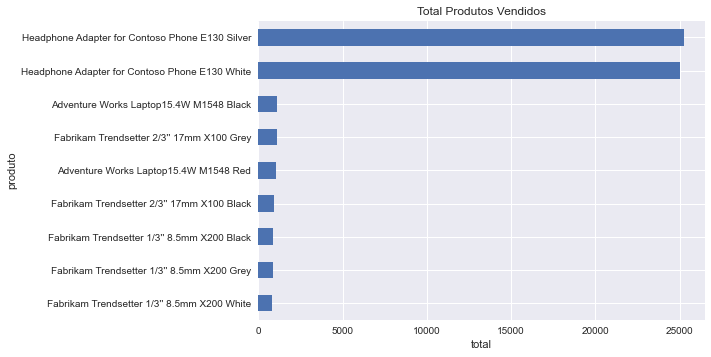

In [101]:
df.groupby("produto")["quantidade"].sum().sort_values(ascending=False)
df.groupby("produto")["quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("total")
plt.ylabel("produto");

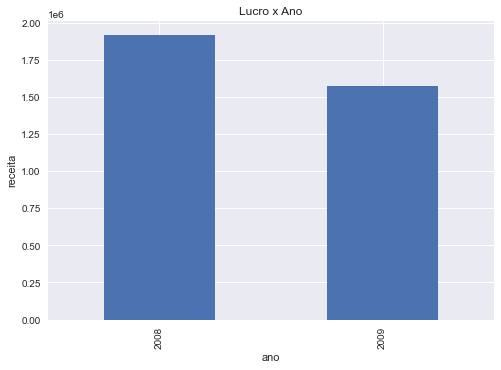

In [102]:
df.groupby(df["data_venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("ano")
plt.ylabel("receita");

In [104]:
df.groupby(df["data_venda"].dt.year)["lucro"].sum()

data_venda
2008    1.920078e+06
2009    1.577745e+06
Name: lucro, dtype: float64

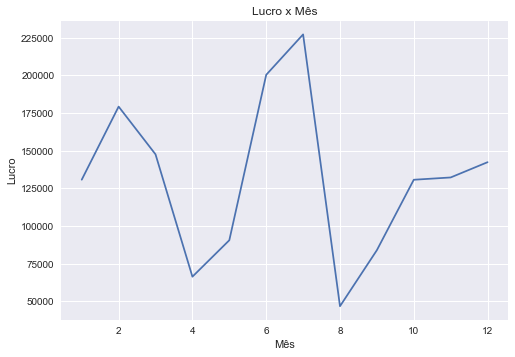

In [108]:
df_2009 = df[df["data_venda"].dt.year == 2009]
df_2009.groupby(df_2009["data_venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

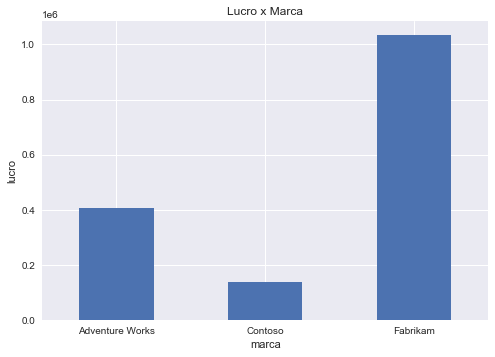

In [109]:
df_2009.groupby("marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("marca")
plt.ylabel("lucro")
plt.xticks(rotation='horizontal');

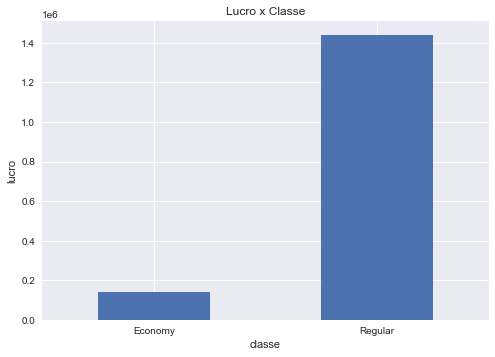

In [110]:
df_2009.groupby("classe")["lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("classe")
plt.ylabel("lucro")
plt.xticks(rotation='horizontal');

In [112]:
df["tempo_envio"].describe()

count    904.000000
mean       8.543142
std        3.056920
min        4.000000
25%        6.000000
50%        9.000000
75%       11.000000
max       20.000000
Name: tempo_envio, dtype: float64

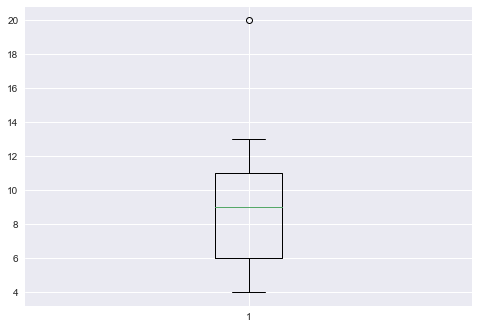

In [113]:
plt.boxplot(df["tempo_envio"]);

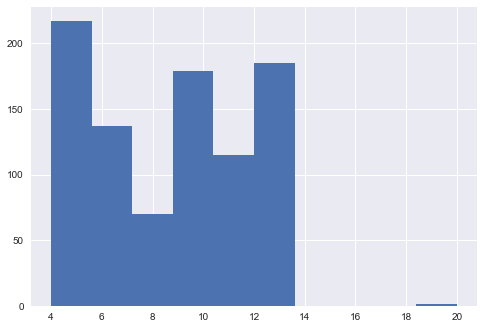

In [114]:
plt.hist(df["tempo_envio"]);

In [116]:
df["tempo_envio"].min()

4

In [117]:
df['tempo_envio'].max()

20

In [119]:
df[df["tempo_envio"] == 20]

,data_venda,data_envio,id_loja,id_produto,id_cliente,no._venda,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [120]:
df.to_csv(file_path + "/df_para_arquivo.csv", index=False)